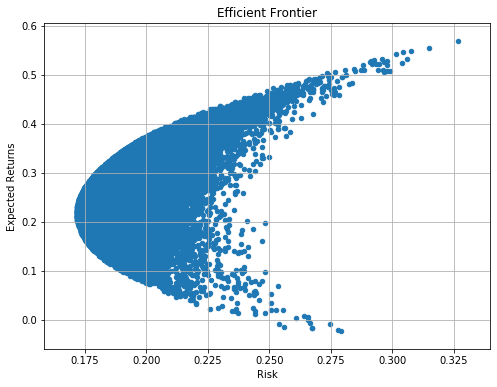

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Analyzer

mk = Analyzer.MarketDB()
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2016-01-04', '2018-04-27')['close']
  
daily_ret = df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

port_ret = [] 
port_risk = [] 
port_weights = [] 

for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights /= np.sum(weights) 

    returns = np.dot(weights, annual_ret) 
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights) 

portfolio = {'Returns': port_ret, 'Risk': port_risk} 
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk'] + [s for s in stocks]] 

df.plot.scatter(x='Risk', y='Returns', figsize=(8, 6), grid=True)
plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Analyzer

mk = Analyzer.MarketDB()
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2016-01-04', '2018-04-27')['close']

df

,삼성전자,SK하이닉스,현대자동차,NAVER
date,,,,
2016-09-02,1597000,36650,135000,831000
2016-09-05,1606000,37500,139000,850000
2016-09-06,1643000,38000,139500,843000
2016-09-07,1621000,37900,139000,872000
2016-09-08,1639000,38700,139000,869000
...,...,...,...,...
2018-04-23,2595000,84400,159500,735000
2018-04-24,2523000,82100,162500,725000
2018-04-25,2520000,82400,164000,743000


### 포트폴리오 최적화

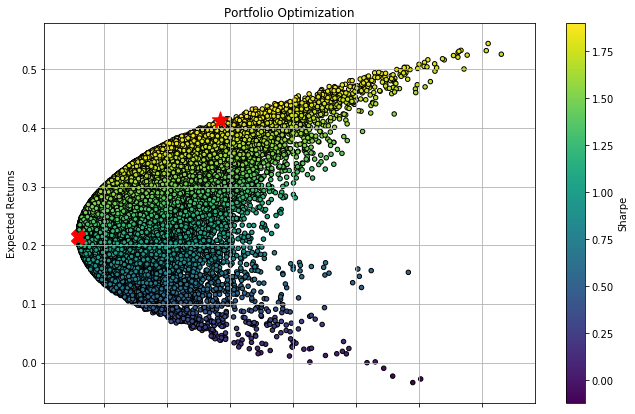

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Analyzer

mk = Analyzer.MarketDB()
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2016-01-04', '2018-04-27')['close']
  
daily_ret = df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

port_ret = [] 
port_risk = [] 
port_weights = []
sharpe_ratio = [] 

for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights /= np.sum(weights) 

    returns = np.dot(weights, annual_ret) 
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)  # ①

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in stocks]]  # ② 

max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]  # ③
min_risk = df.loc[df['Risk'] == df['Risk'].min()]  # ④

df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis',
    edgecolors='k', figsize=(11,7), grid=True)  # ⑤
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', 
    marker='*', s=300)  # ⑥
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', 
    marker='X', s=200)  # ⑦
plt.title('Portfolio Optimization') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show()

### 볼린저밴드

end_date is initialized to '2020-09-30'


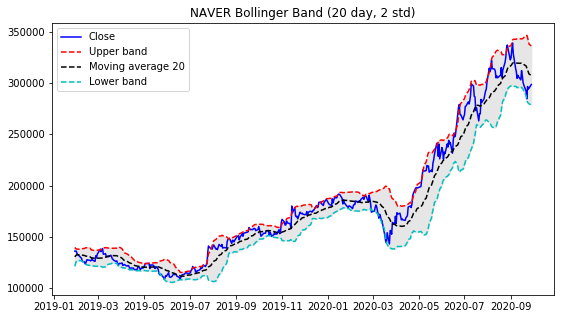

In [3]:
import matplotlib.pyplot as plt
import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2019-01-02')
  
df['MA20'] = df['close'].rolling(window=20).mean()  # ①
df['stddev'] = df['close'].rolling(window=20).std() # ②
df['upper'] = df['MA20'] + (df['stddev'] * 2)   # ③
df['lower'] = df['MA20'] - (df['stddev'] * 2)   # ④
df = df[19:]  # ⑤

plt.figure(figsize=(9, 5))
plt.plot(df.index, df['close'], color='#0000ff', label='Close')    # ⑥
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')       # ⑦
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  # ⑧ 
plt.legend(loc='best')
plt.title('NAVER Bollinger Band (20 day, 2 std)')
plt.show()

##### BollingerBand_PercentB

end_date is initialized to '2020-09-30'


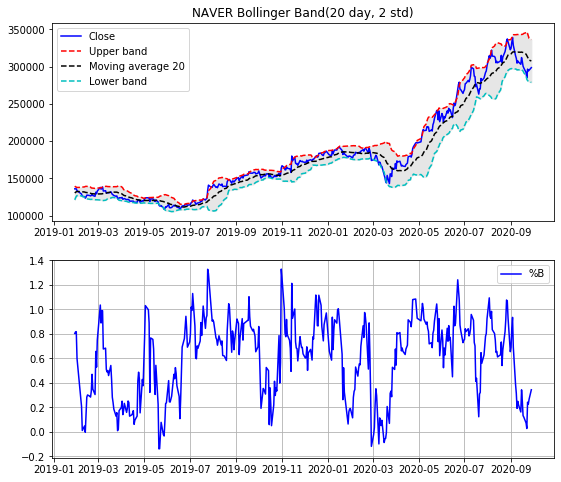

In [4]:
import matplotlib.pyplot as plt
import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2019-01-02')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])  # ①
df = df[19:]

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)  # ②
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)  # ③
plt.plot(df.index, df['PB'], color='b', label='%B')  # ④
plt.grid(True)
plt.legend(loc='best')
plt.show()

##### BollingerBand_BandWidth

end_date is initialized to '2020-09-30'


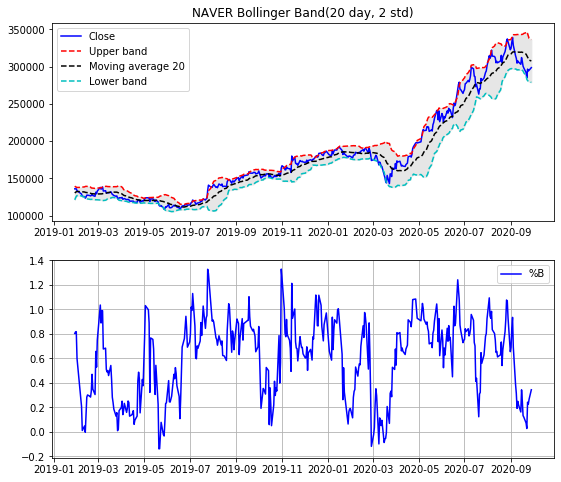

In [5]:
import matplotlib.pyplot as plt
import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2019-01-02')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])  # ①
df = df[19:]

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)  # ②
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)  # ③
plt.plot(df.index, df['PB'], color='b', label='%B')  # ④
plt.grid(True)
plt.legend(loc='best')
plt.show()

##### BollingerBand_TrendFollowing

end_date is initialized to '2020-09-30'


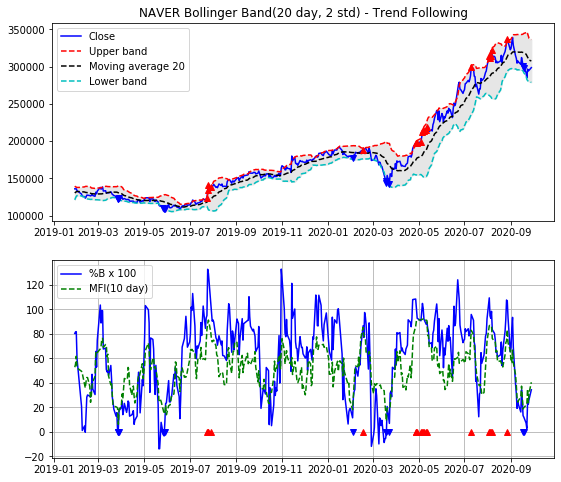

In [6]:
import matplotlib.pyplot as plt
import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2019-01-02')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])
df['TP'] = (df['high'] + df['low'] + df['close']) / 3
df['PMF'] = 0
df['NMF'] = 0
for i in range(len(df.close)-1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
df['MFR'] = (df.PMF.rolling(window=10).sum() /
    df.NMF.rolling(window=10).sum())
df['MFI10'] = 100 - 100 / (1 + df['MFR'])
df = df[19:]

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.title('NAVER Bollinger Band(20 day, 2 std) - Trend Following')
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:       # ①
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # ②
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:     # ③
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # ④
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100')       # ⑤ 
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)')     # ⑥
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])                  # ⑦
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show();   

##### BollingerBand_IIP21

end_date is initialized to '2020-09-30'


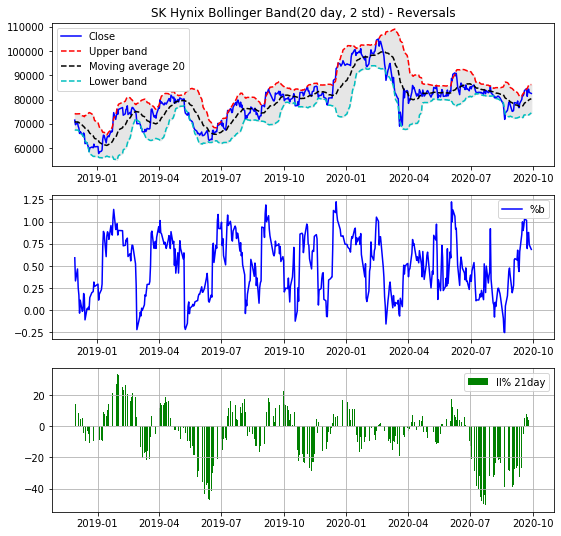

In [8]:
import matplotlib.pyplot as plt
import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('SK하이닉스', '2018-11-01')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['close']-df['high']-df['low'])/(df['high']-df['low'])*df['volume']  # ①
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum()*100  # ②
df = df.dropna()

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.title('SK Hynix Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df['close'], 'b', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')

plt.legend(loc='best')
plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)  # ③
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')  # ④
plt.grid(True)
plt.legend(loc='best')
plt.show()

##### BollingerBand_Reversals

end_date is initialized to '2020-09-30'


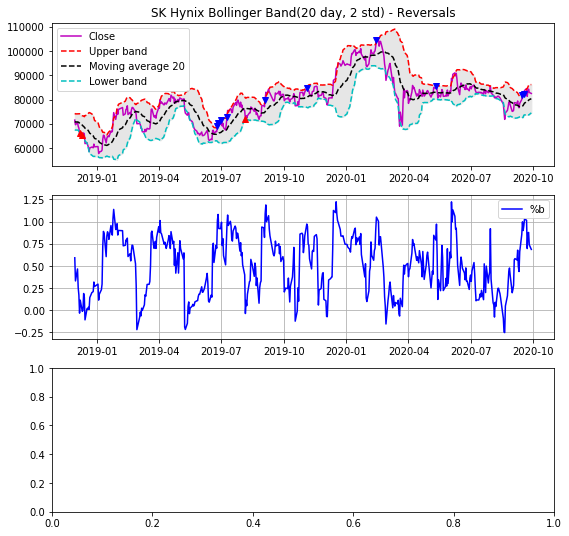

In [9]:
import matplotlib.pyplot as plt
import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('SK하이닉스', '2018-11-01')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['close']-df['high']-df['low'])/(df['high']-df['low'])*df['volume']
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum()*100
df = df.dropna()

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.title('SK Hynix Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df['close'], 'm', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:   
        plt.plot(df.index.values[i], df.close.values[i], 'r^')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0: 
        plt.plot(df.index.values[i], df.close.values[i], 'bv')


plt.legend(loc='best')
plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)

### 삼중매매
##### 첫번쨰 창 - 시장조류

C:\Users\ZENBOOK\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


end_date is initialized to '2020-09-30'


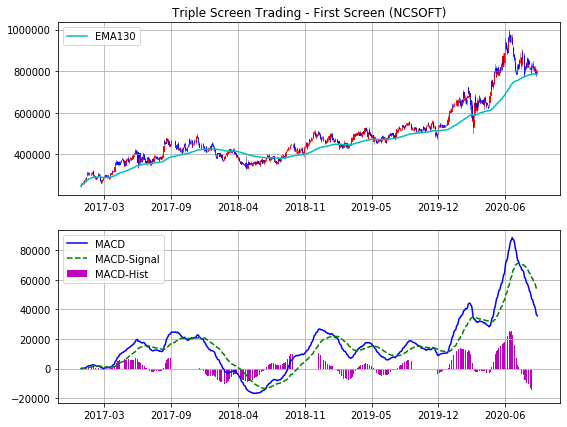

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('엔씨소프트', '2017-01-01')


ema60 = df.close.ewm(span=60).mean()   # ① 종가의 12주 지수 이동평균
ema130 = df.close.ewm(span=130).mean() # ② 종가의 12주 지수 이동평균
macd = ema60 - ema130                  # ③ MACD선
signal = macd.ewm(span=45).mean()      # ④ 신호선(MACD의 9주 지수 이동평균)
macdhist = macd - signal               # ⑤ MACD 히스토그램

df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal,
    macdhist=macdhist).dropna() 
df['number'] = df.index.map(mdates.date2num)  # ⑥
ohlc = df[['number','open','high','low','close']]

plt.figure(figsize=(9, 7))
p1 = plt.subplot(2, 1, 1)
plt.title('Triple Screen Trading - First Screen (NCSOFT)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', 
    colordown='blue')  # ⑦
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
plt.legend(loc='best')

p2 = plt.subplot(2, 1, 2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label='MACD-Hist')
plt.plot(df.number, df['macd'], color='b', label='MACD')
plt.plot(df.number, df['signal'], 'g--', label='MACD-Signal')
plt.legend(loc='best')
plt.show()

##### 두번째 창 - 시장파도

end_date is initialized to '2020-09-30'


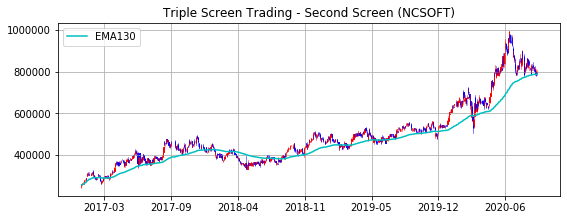

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('엔씨소프트', '2017-01-01')

ema60 = df.close.ewm(span=60).mean()
ema130 = df.close.ewm(span=130).mean() 
macd = ema60 - ema130
signal = macd.ewm(span=45).mean() 
macdhist = macd - signal

df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal,
    macdhist=macdhist).dropna()
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','open','high','low','close']]

ndays_high = df.high.rolling(window=14, min_periods=1).max()      # ①
ndays_low = df.low.rolling(window=14, min_periods=1).min()        # ②
fast_k = (df.close - ndays_low) / (ndays_high - ndays_low) * 100  # ③
slow_d= fast_k.rolling(window=3).mean()                           # ④
df = df.assign(fast_k=fast_k, slow_d=slow_d).dropna()             # ⑤

plt.figure(figsize=(9, 7))
p1 = plt.subplot(2, 1, 1)
plt.title('Triple Screen Trading - Second Screen (NCSOFT)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
plt.legend(loc='best')

##### 세번째 창 - 진입기술

end_date is initialized to '2020-09-30'


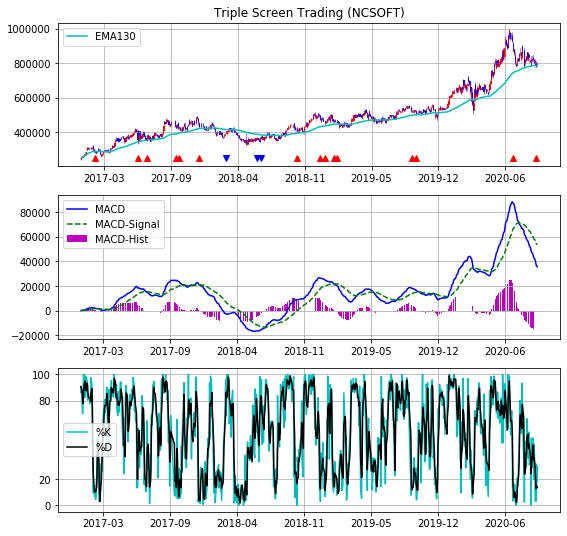

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('엔씨소프트', '2017-01-01')

ema60 = df.close.ewm(span=60).mean()
ema130 = df.close.ewm(span=130).mean()
macd = ema60 - ema130
signal = macd.ewm(span=45).mean()
macdhist = macd - signal
df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal, macdhist=macdhist).dropna()

df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','open','high','low','close']]

ndays_high = df.high.rolling(window=14, min_periods=1).max()
ndays_low = df.low.rolling(window=14, min_periods=1).min()

fast_k = (df.close - ndays_low) / (ndays_high - ndays_low) * 100
slow_d = fast_k.rolling(window=3).mean()
df = df.assign(fast_k=fast_k, slow_d=slow_d).dropna()

plt.figure(figsize=(9, 9))
p1 = plt.subplot(3, 1, 1)
plt.title('Triple Screen Trading (NCSOFT)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
for i in range(1, len(df.close)):
    if df.ema130.values[i-1] < df.ema130.values[i] and \
        df.slow_d.values[i-1] >= 20 and df.slow_d.values[i] < 20:
        plt.plot(df.number.values[i], 250000, 'r^') 
    elif df.ema130.values[i-1] > df.ema130.values[i] and \
        df.slow_d.values[i-1] <= 80 and df.slow_d.values[i] > 80:
        plt.plot(df.number.values[i], 250000, 'bv') 
plt.legend(loc='best')

p2 = plt.subplot(3, 1, 2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label='MACD-Hist')
plt.plot(df.number, df['macd'], color='b', label='MACD')
plt.plot(df.number, df['signal'], 'g--', label='MACD-Signal')
plt.legend(loc='best')

p3 = plt.subplot(3, 1, 3)
plt.grid(True)
p3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color='c', label='%K')
plt.plot(df.number, df['slow_d'], color='k', label='%D')
plt.yticks([0, 20, 80, 100])
plt.legend(loc='best')
plt.show()

### 모멘텀

In [19]:
import pandas as pd
import pymysql
from datetime import datetime
from datetime import timedelta
import Analyzer

class DualMomentum:
    def __init__(self):
        """생성자: KRX 종목코드(codes)를 구하기 위한 MarkgetDB 객체 생성"""
        self.mk = Analyzer.MarketDB()
    
    def get_rltv_momentum(self, start_date, end_date, stock_count):
        """특정 기간 동안 수익률이 제일 높았던 stock_count 개의 종목들 (상대 모멘텀)
            - start_date  : 상대 모멘텀을 구할 시작일자 ('2020-01-01')   
            - end_date    : 상대 모멘텀을 구할 종료일자 ('2020-12-31')
            - stock_count : 상대 모멘텀을 구할 종목수
        """       
        connection = pymysql.connect(host='localhost', port=3306, 
            db='INVESTAR', user='root', passwd='******', autocommit=True)
        cursor = connection.cursor()
        
        # 사용자가 입력한 시작일자를 DB에서 조회되는 일자로 보정 
        sql = f"select max(date) from daily_price where date <= '{start_date}'"
        cursor.execute(sql)
        result = cursor.fetchone()
        if (result[0] is None):
            print ("start_date : {} -> returned None".format(sql))
            return
        start_date = result[0].strftime('%Y-%m-%d')


        # 사용자가 입력한 종료일자를 DB에서 조회되는 일자로 보정
        sql = f"select max(date) from daily_price where date <= '{end_date}'"
        cursor.execute(sql)
        result = cursor.fetchone()
        if (result[0] is None):
            print ("end_date : {} -> returned None".format(sql))
            return
        end_date = result[0].strftime('%Y-%m-%d')


        # KRX 종목별 수익률을 구해서 2차원 리스트 형태로 추가
        rows = []
        columns = ['code', 'company', 'old_price', 'new_price', 'returns']
        for _, code in enumerate(self.mk.codes):            
            sql = f"select close from daily_price "\
                f"where code='{code}' and date='{start_date}'"
            cursor.execute(sql)
            result = cursor.fetchone()
            if (result is None):
                continue
            old_price = int(result[0])
            sql = f"select close from daily_price "\
                f"where code='{code}' and date='{end_date}'"
            cursor.execute(sql)
            result = cursor.fetchone()
            if (result is None):
                continue
            new_price = int(result[0])
            returns = (new_price / old_price - 1) * 100
            rows.append([code, self.mk.codes[code], old_price, new_price, 
                returns])


        # 상대 모멘텀 데이터프레임을 생성한 후 수익률순으로 출력
        df = pd.DataFrame(rows, columns=columns)
        df = df[['code', 'company', 'old_price', 'new_price', 'returns']]
        df = df.sort_values(by='returns', ascending=False)
        df = df.head(stock_count)
        df.index = pd.Index(range(stock_count))
        connection.close()
        print(df)
        print(f"\nRelative momentum ({start_date} ~ {end_date}) : "\
            f"{df['returns'].mean():.2f}% \n")
        return df
    
    def get_abs_momentum(self, rltv_momentum, start_date, end_date):
        """특정 기간 동안 상대 모멘텀에 투자했을 때의 평균 수익률 (절대 모멘텀)
            - rltv_momentum : get_rltv_momentum() 함수의 리턴값 (상대 모멘텀)
            - start_date    : 절대 모멘텀을 구할 매수일 ('2020-01-01')   
            - end_date      : 절대 모멘텀을 구할 매도일 ('2020-12-31')
        """
        stockList = list(rltv_momentum['code'])        
        connection = pymysql.connect(host='localhost', port=3306, 
            db='INVESTAR', user='root', passwd='******', autocommit=True)
        cursor = connection.cursor()


        # 사용자가 입력한 매수일을 DB에서 조회되는 일자로 변경 
        sql = f"select max(date) from daily_price "\
            f"where date <= '{start_date}'"
        cursor.execute(sql)
        result = cursor.fetchone()
        if (result[0] is None):
            print ("{} -> returned None".format(sql))
            return
        start_date = result[0].strftime('%Y-%m-%d')


        # 사용자가 입력한 매도일을 DB에서 조회되는 일자로 변경 
        sql = f"select max(date) from daily_price "\
            f"where date <= '{end_date}'"
        cursor.execute(sql)
        result = cursor.fetchone()
        if (result[0] is None):
            print ("{} -> returned None".format(sql))
            return
        end_date = result[0].strftime('%Y-%m-%d')


        # 상대 모멘텀의 종목별 수익률을 구해서 2차원 리스트 형태로 추가
        rows = []
        columns = ['code', 'company', 'old_price', 'new_price', 'returns']
        for _, code in enumerate(stockList):            
            sql = f"select close from daily_price "\
                f"where code='{code}' and date='{start_date}'"
            cursor.execute(sql)
            result = cursor.fetchone()
            if (result is None):
                continue
            old_price = int(result[0])
            sql = f"select close from daily_price "\
                f"where code='{code}' and date='{end_date}'"
            cursor.execute(sql)
            result = cursor.fetchone()
            if (result is None):
                continue
            new_price = int(result[0])
            returns = (new_price / old_price - 1) * 100
            rows.append([code, self.mk.codes[code], old_price, new_price,
                returns])


        # 절대 모멘텀 데이터프레임을 생성한 후 수익률순으로 출력
        df = pd.DataFrame(rows, columns=columns)
        df = df[['code', 'company', 'old_price', 'new_price', 'returns']]
        df = df.sort_values(by='returns', ascending=False)
        connection.close()
        print(df)
        print(f"\nAbasolute momentum ({start_date} ~ {end_date}) : "\
            f"{df['returns'].mean():.2f}%")
        return